In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


input_dir = 'dataset'  # Diretório com as imagens originais
output_dir = 'normalized_dataset'  # Diretório para salvar as imagens equalizadas

In [2]:
def equalize_histogram(image):
    """
    Aplica equalização de histograma a uma imagem em escala de cinza.
    
    Args:
        image (numpy array): Imagem de entrada.
    
    Returns:
        numpy array: Imagem com equalização de histograma.
    """
    return cv2.equalizeHist(image)

In [3]:
def process_images(input_dir, output_dir):
    """
    Processa todas as imagens do dataset, aplicando equalização de histograma e salvando as imagens normalizadas.
    
    Args:
        input_dir (str): Caminho para o diretório de entrada com as imagens originais.
        output_dir (str): Caminho para o diretório de saída para salvar as imagens normalizadas.
    
    Returns:
        dict: Dicionário contendo as imagens processadas organizadas por classe.
    """
    # Criar a pasta de saída se não existir
    os.makedirs(output_dir, exist_ok=True)
    
    images_by_class = {}  # Dicionário para armazenar as imagens por classe
    
    for root, dirs, files in os.walk(input_dir):
        for filename in files:
            if filename.lower().endswith(('.png')):
                img_path = os.path.join(root, filename)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Ler a imagem em escala de cinza
                
                # Equalizar o histograma
                equalized_image = equalize_histogram(image)
                
                # Gerar caminho da pasta de saída correspondente
                relative_path = os.path.relpath(root, input_dir)
                output_folder = os.path.join(output_dir, relative_path)
                os.makedirs(output_folder, exist_ok=True)
                
                # Salvar a imagem normalizada
                output_filename = os.path.join(output_folder, filename)
                cv2.imwrite(output_filename, equalized_image)
                
                # Organizar as imagens por classe
                class_name = os.path.basename(root)
                if class_name not in images_by_class:
                    images_by_class[class_name] = []
                images_by_class[class_name].append(equalized_image)
    
    return images_by_class

In [4]:
def calculate_mean_prototype(images_by_class):
    """
    Calcula o protótipo médio (média das imagens) para cada classe.
    
    Args:
        images_by_class (dict): Dicionário contendo as imagens organizadas por classe.
    
    Returns:
        dict: Dicionário contendo o protótipo médio de cada classe.
    """
    mean_prototypes = {}
    for class_name, images in images_by_class.items():
        # Calcular a média de todas as imagens da classe
        mean_image = np.mean(images, axis=0)
        mean_prototypes[class_name] = mean_image
    return mean_prototypes

In [5]:
def calculate_histogram(images, bins=256):
    """
    Calcula o histograma médio e a variância do histograma para um conjunto de imagens.
    
    Args:
        images (list): Lista de imagens da classe.
        bins (int): Número de bins para o histograma.
    
    Returns:
        tuple: Histograma médio e variância do histograma.
    """
    histograms = []
    
    for image in images:
        # Calcular o histograma de cada imagem (normalizado)
        hist = cv2.calcHist([image], [0], None, [bins], [0, 256])
        hist /= hist.sum()  # Normalizar o histograma
        histograms.append(hist.flatten())
    
    histograms = np.array(histograms)
    
    # Calcular o histograma médio e a variância do histograma
    mean_histogram = np.mean(histograms, axis=0)
    variance_histogram = np.var(histograms, axis=0)
    
    return mean_histogram, variance_histogram

In [6]:
def show_image(image, title="Imagem"):
    """
    Exibe uma imagem usando matplotlib.
    
    Args:
        image (numpy array): Imagem a ser exibida.
        title (str): Título da imagem.
    """
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


In [7]:
def show_histogram(histogram, title="Histograma"):
    """
    Exibe um histograma.
    
    Args:
        histogram (numpy array): Histograma a ser exibido.
        title (str): Título do histograma.
    """
    plt.plot(histogram)
    plt.title(title)
    plt.xlabel('Intensidade de Pixel')
    plt.ylabel('Frequência')
    plt.show()

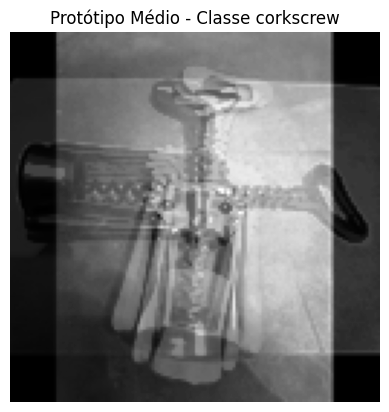

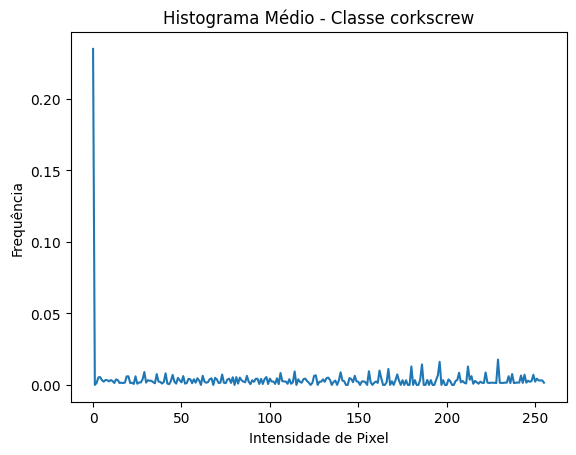

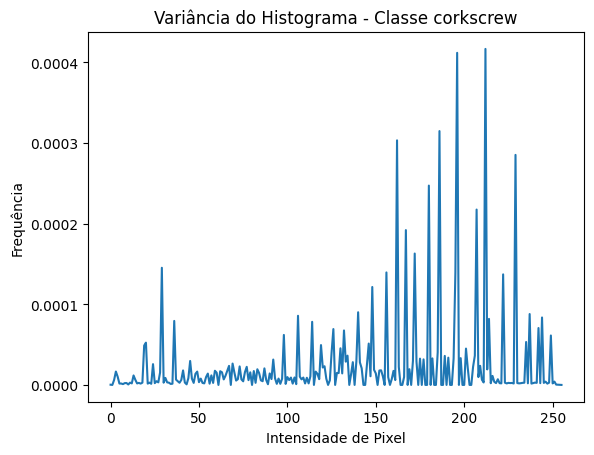

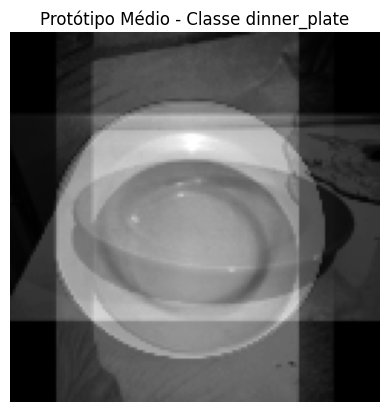

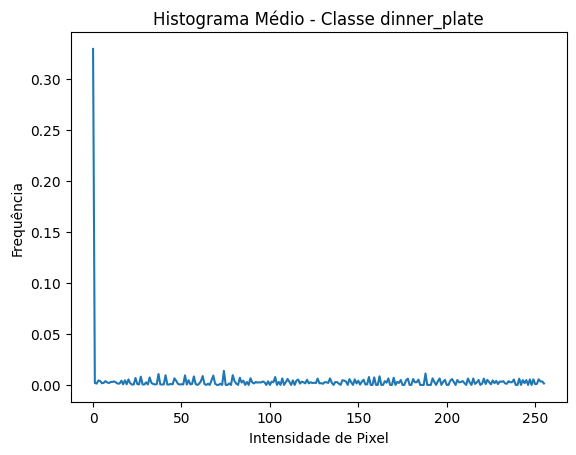

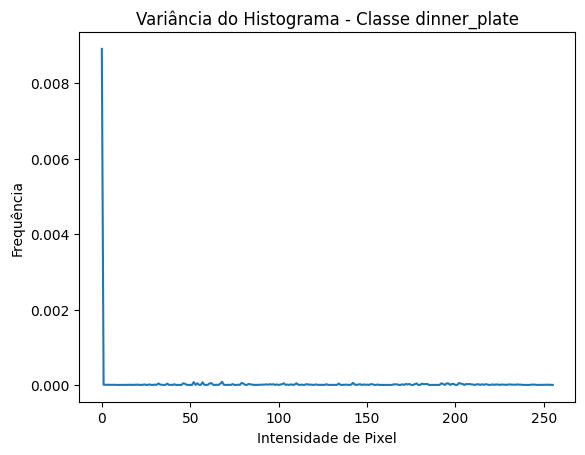

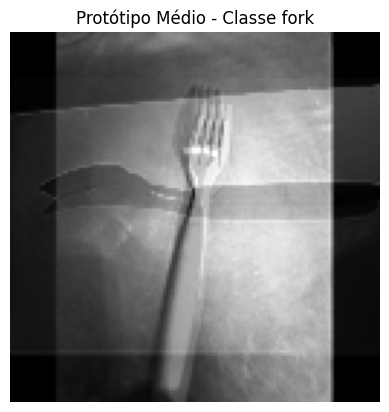

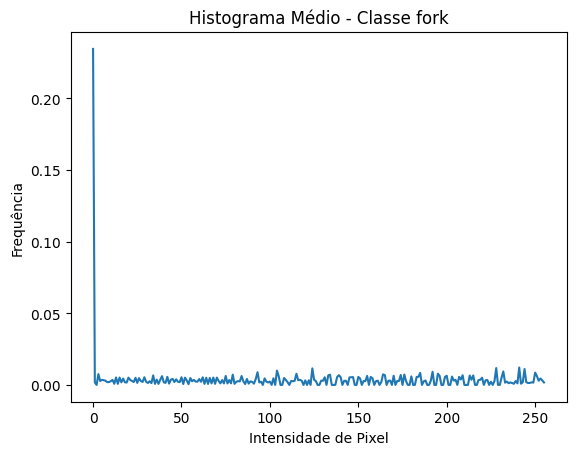

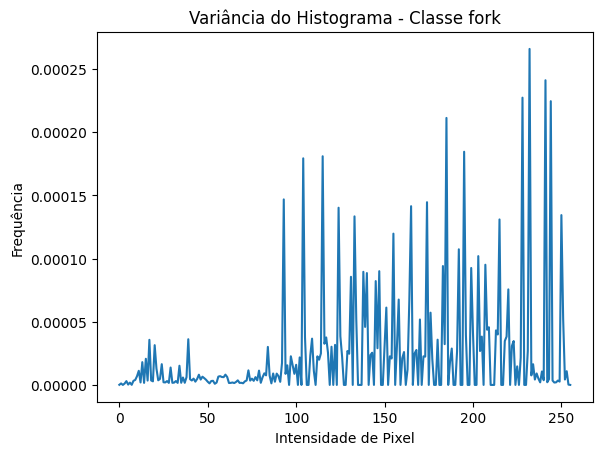

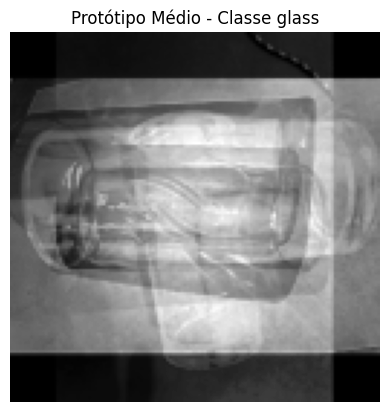

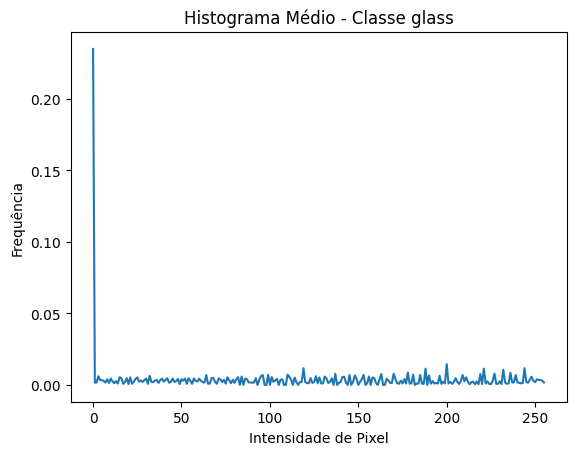

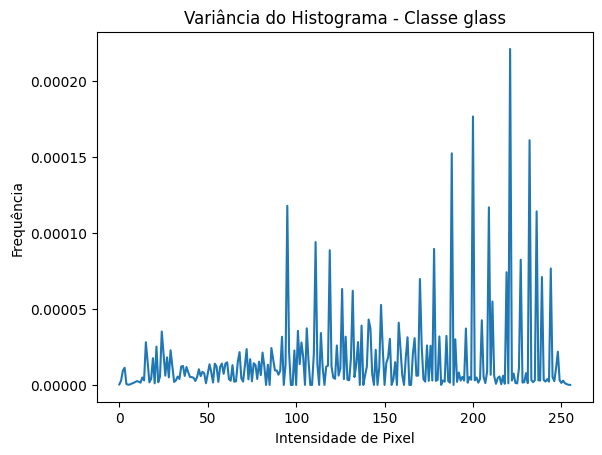

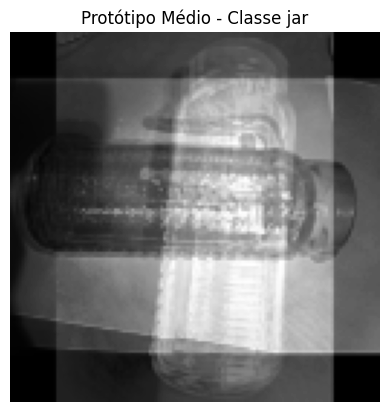

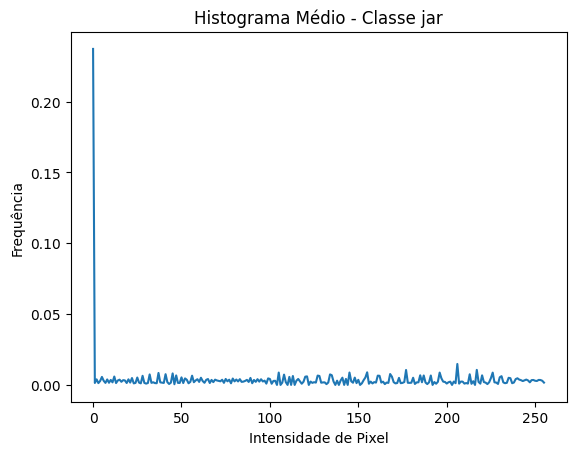

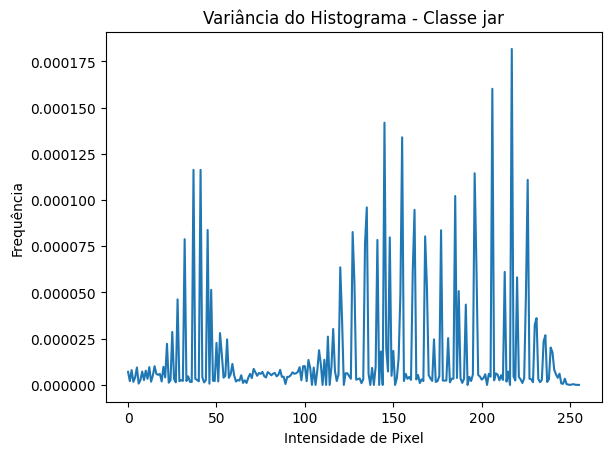

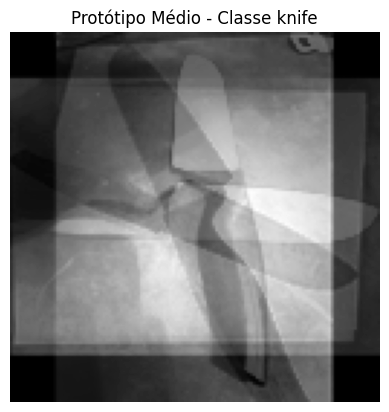

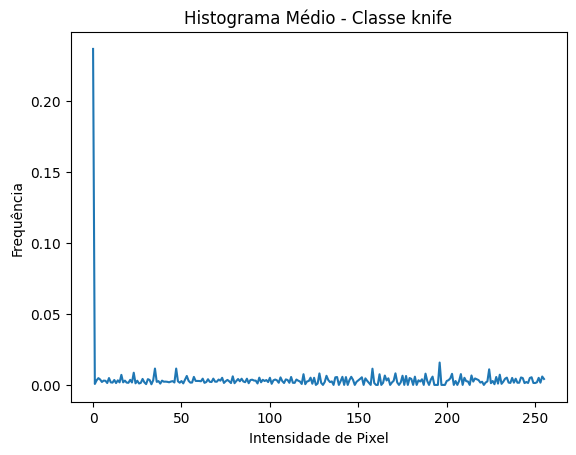

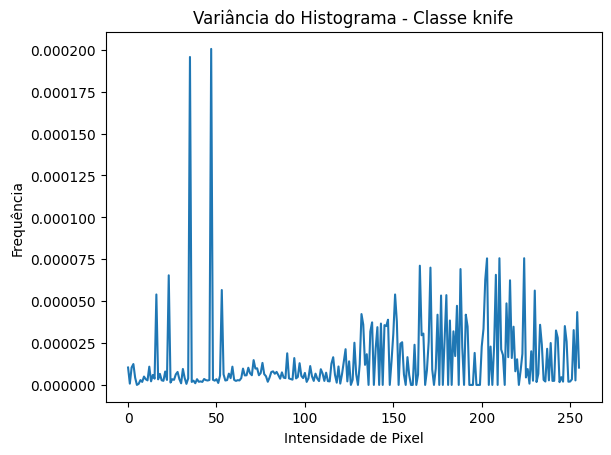

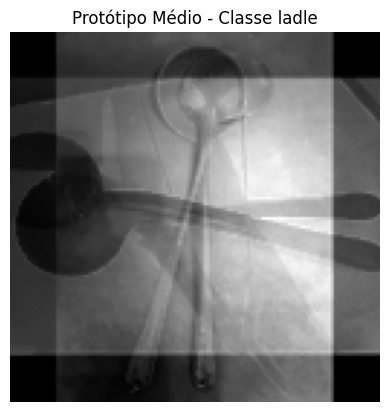

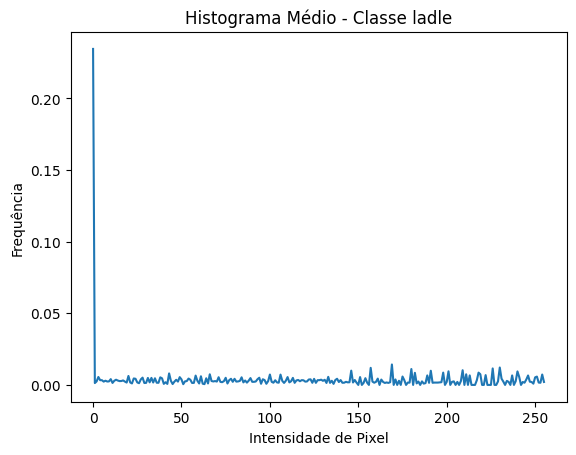

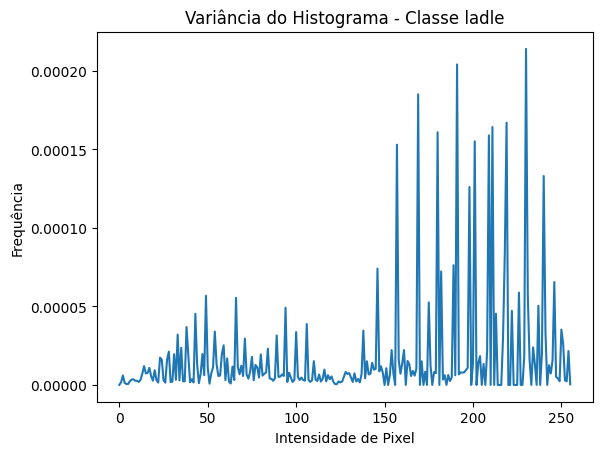

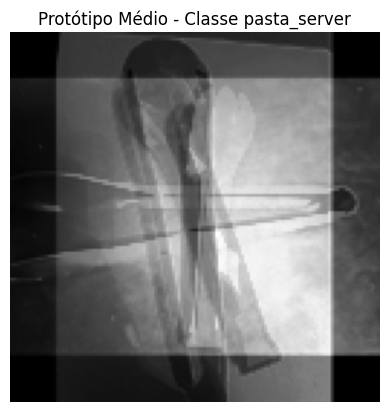

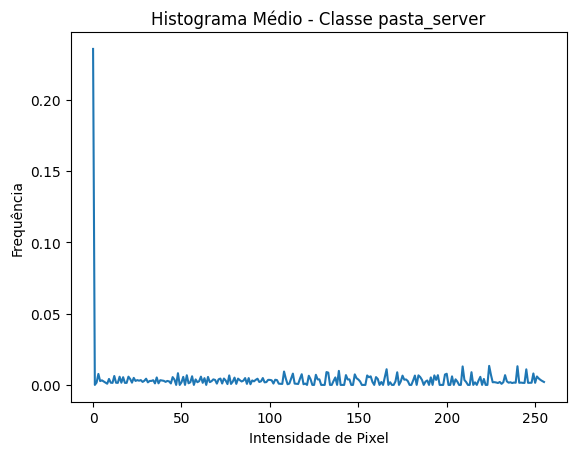

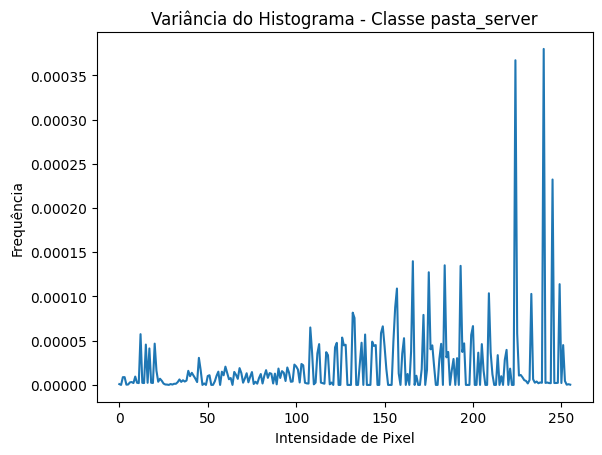

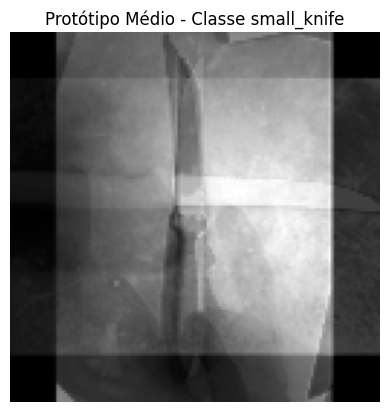

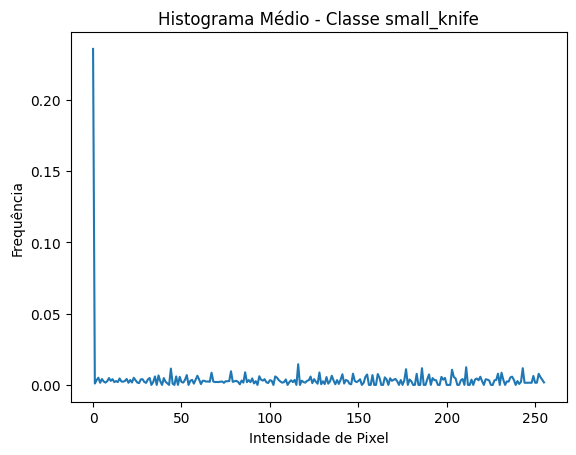

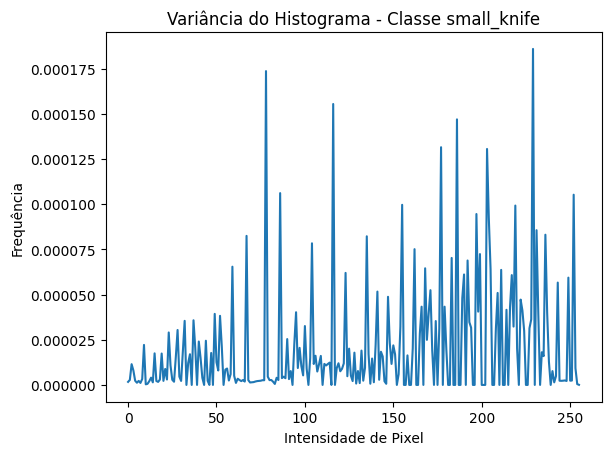

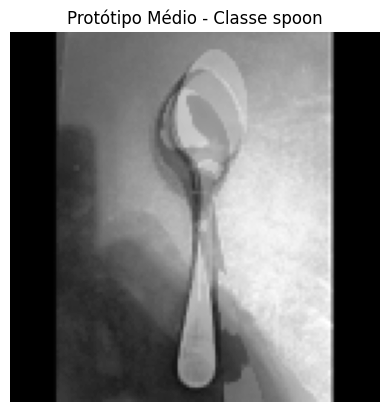

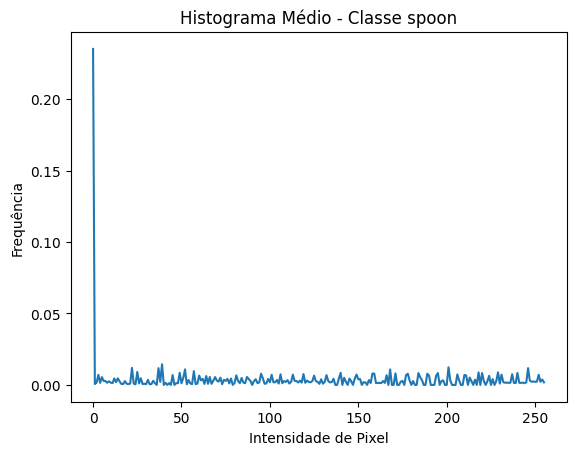

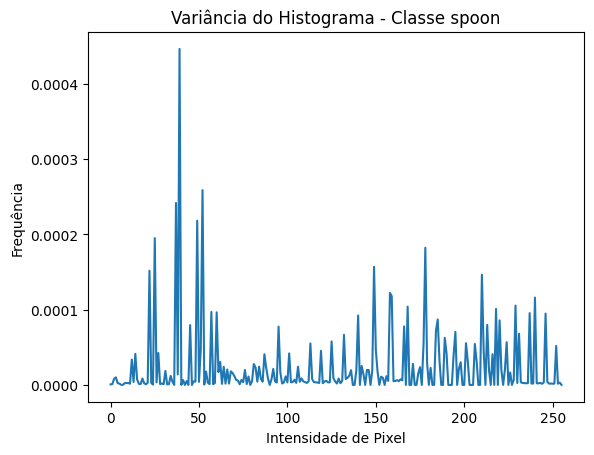

In [8]:
# Passo 1: Equalizar as imagens e organizá-las por classe
images_by_class = process_images(input_dir, output_dir)

# Passo 2: Calcular o protótipo médio de cada classe
mean_prototypes = calculate_mean_prototype(images_by_class)

# Passo 3: Calcular o histograma médio e a variância do histograma de cada classe
histograms_by_class = {}
variance_by_class = {}

for class_name, images in images_by_class.items():
    mean_histogram, variance_histogram = calculate_histogram(images)
    histograms_by_class[class_name] = mean_histogram
    variance_by_class[class_name] = variance_histogram
    
    # Mostrar o protótipo médio, histograma médio e variância do histograma para cada classe
    show_image(mean_prototypes[class_name], title=f'Protótipo Médio - Classe {class_name}')
    show_histogram(mean_histogram, title=f'Histograma Médio - Classe {class_name}')
    show_histogram(variance_histogram, title=f'Variância do Histograma - Classe {class_name}')
